# データ解析特論 2022年度水曜２限

# 第13回 気合いで誤差逆伝播

<h3>概要：<br>隠れ層を1層持つ Multi-Layer Perceptron を気合いで学習する</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntProgress, FloatProgress

## データ

サイズ $N$ のデータ $(x_n, \ y_n)$ を以下の通りに作る．
$$
y_n = \sin(2\pi x_n) \cos(5\pi x_n) + 2x_n + \xi_n
$$
$\xi_n$ は適当な独立同分布の乱数としておく．

$y=f(x)$ の回帰モデルをデータから MLP を用いて構成しよう．

In [2]:
# y=dataf(x)
def dataf(X):
    return np.sin(2*np.pi*X)*np.cos(5*np.pi*X) + 2*X

(30, 2)


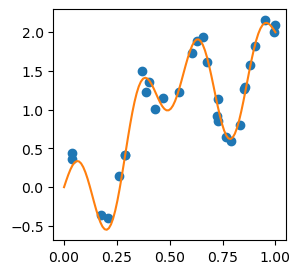

In [6]:
# サンプルサイズ
N = 30

# seed
np.random.seed(seed=2222)

# x 変数 X^{(1)}
X1 = np.sort(np.random.rand(N))

# 0列目に1を入れたデータ行列を X とおく
X = np.hstack([np.ones((N, 1)), X1.reshape(-1, 1)])
print(X.shape)

# y 変数（ノイズを付加）
Y = dataf(X1) + (np.random.rand(N) - 0.5)*0.5

# 関数のグラフ描画用のデータ生成
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(X1, Y, 'o')

X1plot = np.linspace(0, 1, 100)
Yplot = dataf(X1plot)
ax.plot(X1plot, Yplot)

## 活性化関数

第1層への重み $\mathbf W^{(1)}$ の第0列（定数ノードへの重み）は固定する．

ここでは活性化関数として ReLU を使うと $\phi^{-1}(1) = 1$ とする．

In [7]:
# activation function
def phi(X):
    return np.maximum(X, 0.0)
    
# derivative of activation function
def Dphi(X):
    return np.heaviside(X, 0.0)

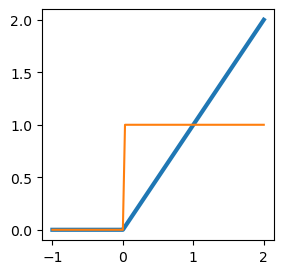

In [11]:
# plot phi(x) and phi'(x)
fig, ax = plt.subplots(figsize=(3, 3))
XXplot = np.linspace(-1, 2, 100)
ax.plot(XXplot, phi(XXplot), lw=3)
ax.plot(XXplot, Dphi(XXplot))

## 学習（正則化なし）

IntProgress(value=0, max=1000000)

1.7098196895659612e-05
CPU times: user 6min 19s, sys: 4.9 s, total: 6min 24s
Wall time: 1min 36s


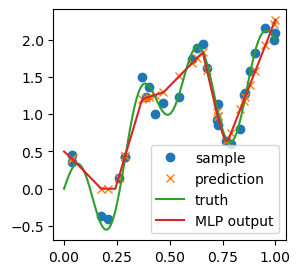

In [17]:
%%time
# 反復最大回数 max_iter
max_iter = 1000000

# 学習率 eta
eta = 0.001

# 反復の更新を停止する閾値
tol = 1e-6

# size of hidden layer d
d = 100

# 第1層への重み W1 の初期値
W1 = np.random.normal(size=(2, d+1))

# 定数ノードへの重みは固定
W1[0, 0] = 1.0
W1[1, 0] = 0.0

# 出力層への重み W2 の初期値
W2 = np.random.normal(size=d+1)

# IntProgress で反復の経過を表示
IP = IntProgress(min=0, max=max_iter)
display(IP)
IP.value = 0
IP.description = '0'

# 勾配降下法で反復
for i_iter in range(max_iter):
    if (i_iter+1)%10000 == 0:
        IP.value = i_iter + 1
        IP.description = '%d'%(i_iter+1)
    
    # 前ステップの重みを保存
    W1prev, W2prev = np.copy(W1), np.copy(W2)
    
    # hidden layer zn
    XW1 = X@W1
    Z = phi(XW1)
    
    # output Yhat
    ZW2 = Z@W2
    Yhat = phi(ZW2)
    
    # residual e
    e = Y - Yhat
    
    # F
    F = np.diag(e) @ Dphi(ZW2)
    
    # gradient wrt W2
    gradW2 = -2.0/N * Z.T @ F
    
    # gn
    G = np.diag(F) @ Dphi(XW1)
    
    # gradient wrt W1
    gradW1 = -2.0/N * X.T @ G @ np.diag(W2)
    
    # adjust the 0-th row of W1
    gradW1[:, 0] = 0.0
    
    # update
    W1 -= eta * gradW1
    W2 -= eta * gradW2
    
    if np.max(np.abs(W1-W1prev)) + np.max(np.abs(W2-W2prev)) < tol:
        print(i_iter+1)
        break

print(np.max(np.abs(W1-W1prev)) + np.max(np.abs(W2-W2prev))  )

# prediction by trained MLP
Ypred = phi(phi(X@W1)@W2)

# data for visualization of MLP output
Xplot = np.hstack([np.ones((X1plot.size, 1)), X1plot.reshape(-1, 1)])
Yplotpred = phi(phi(Xplot@W1)@W2)

# plot Ypred
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(X1, Y, 'o', label='sample')
ax.plot(X1, Ypred, 'x', label='prediction')
ax.plot(X1plot, Yplot, label='truth')
ax.plot(X1plot, Yplotpred, label='MLP output')
ax.legend()

## 学習（Ridge正則化）

In [ ]:
%%time
# 反復最大回数 max_iter


# 学習率 eta


# 正則化パラメータ


# 反復の更新を停止する閾値


# size of hidden layer d


# 第1層への重み W1 の初期値


# 定数ノードへの重みは固定


# 出力層への重み W2 の初期値


# IntProgress で反復の経過を表示


# 勾配降下法で反復
for i_iter in range(max_iter):

    
    # 前ステップの重みを保存

    
    # hidden layer zn

    
    # output Yhat

    
    # residual e
    
    
    # F

    
    # gradient wrt W1

    
    # gn

    
    # gradient wrt W1

    
    # adjust the 0-th row of W1

    
    # update

    

    

    
# prediction by trained MLP


# data for visualization of MLP output


# plot Ypred

        

## 学習（Lasso正則化）

In [ ]:
### Soft-Thresholding



In [ ]:
%%time
# 反復最大回数 max_iter


# 学習率 eta


# 正則化パラメータ


# 反復の更新を停止する閾値


# size of hidden layer d


# 第1層への重み W1 の初期値


# 定数ノードへの重みは固定


# 出力層への重み W2 の初期値


# IntProgress で反復の経過を表示


# 勾配降下法で反復
for i_iter in range(max_iter):
    if (i_iter+1)%10000 == 0:
        fp.value = i_iter+1
        fp.description = '%d'%(i_iter+1)
    
    # 前ステップの重みを保存

    
    # hidden layer zn

    
    # output Yhat

    
    # residual e

    
    # F

    
    # gradient wrt W1

    
    # gn

    
    # gradient wrt W1

    
    # adjust the 0-th row of W1

    
    # update

    

    

    
# prediction by trained MLP


# data for visualization of MLP output


# plot Ypred



## 課題13-1

活性化関数を $\phi(x)=\tanh(x)$ に変えると MLP の回帰はどのように変わるか．実際に学習して，描画し，結果から考察せよ．

---
## <div style="text-align: right;"><strong>以上</strong></div>